In [593]:
# Standard data science libraries
import pandas as pd
import copy
import numpy as np
from datetime import datetime
from sklearn.impute import SimpleImputer
# Visualization
import seaborn as sns
sns.set()
import matplotlib
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import plotly.express as px
from countrygroups import EUROPEAN_UNION
import re
import os.path 
%matplotlib inline
import pycountry
from googletrans import Translator
import glob
import geopy

In [594]:
import locale
locale.setlocale(locale.LC_ALL, 'en_US')
EU_countries = EUROPEAN_UNION.names

In [ ]:
def get_file(directory):
    for 

In [620]:
def preprocessing(df):
    df['date'] = df['date'].replace({'Date of experience: ': ''}, regex=True)
    df['visit'] = df['visit'].replace({'Trip type: ': ''}, regex=True)
    df['date']= [datetime.strptime(date, '%B %Y')for date in df['date']]
    df = df.sort_values(by='date', ascending=False, inplace=False, ignore_index=True)
    df = df.set_index('date')

    return df

In [621]:
def clustering_process(df):
    df[['city', 'country', 'extra']] = df['visitor_origin'].str.split(', ', expand=True, n=2)
    df = df.drop(['rating','title','text'], axis=1)
    return df

In [686]:
def feature_extraction(df):
    df = preprocessing(df)
    df = clustering_process(df)
    visitors_by_country = df.groupby('country').count().sort_values('visit', ascending=True)
    type_of_visitors    = df.groupby('visit').count().sort_values('country', ascending=True)
    type_of_visitors    = type_of_visitors.T.drop(index=['city', 'country' , 'extra'])
    visitors_by_city    = df.groupby('city').count().sort_values('visit', ascending=True)
    #type_of_visitors.index = idx.rename('grade')
    return visitors_by_country, type_of_visitors, visitors_by_city


In [687]:
def eu_countries(visitors_by_country): 
    visitors_by_country["Non EU"] = 0
    for i in range (len(visitors_by_country)):
        if not(visitors_by_country.index[i] in EU_countries):
            visitors_by_country["Non EU"][i] = int(1)
    return visitors_by_country

In [688]:
def get_visitors(visitors_by_country, visitors_by_city):
    
    visitors_from_munich    = visitors_by_city['visitor_origin']['Munich']
    visitors_outside_munich = visitors_by_country['visitor_origin']['Germany']- visitors_by_city['visitor_origin']['Munich']
    visitors_outside_eu     = visitors_by_country.groupby('Non EU').sum()['visitor_origin'][1]
    visitors_from_eu        = visitors_by_country.groupby('Non EU').sum()['visitor_origin'][0] - visitors_by_country['visitor_origin']['Germany']
    return visitors_from_munich, visitors_outside_munich, visitors_outside_eu, visitors_from_eu
    

In [625]:
file_path = glob.glob('/Users/yacco/Documents/TUM/Applied Machine Learning/group16/Tripadvisor_web_scraper/Preprocessed Datasets/*.csv')

In [689]:
Englischer_Garten = pd.read_csv('English Garden.csv',  header=0, squeeze=True)
visitors_by_country, type_of_visitors, visitors_by_city = feature_extraction(Englischer_Garten)
visitors_by_country = eu_countries (visitors_by_country)
visitors_from_munich, visitors_outside_munich, visitors_outside_eu, visitors_from_eu = get_visitors(visitors_by_country, visitors_by_city)

In [690]:
type_of_visitors

visit,Traveled on business,Traveled solo,Traveled with friends,Traveled with family,Traveled as a couple
visitor_origin,5,34,72,96,143


In [616]:
Englischer_Garten = pd.read_csv('English Garden.csv',  header=0, squeeze=True)

In [617]:
Englischer_Garten.columns

Index(['date', 'title', 'text', 'rating', 'visitor_origin', 'visit'], dtype='object')

In [590]:
Englischer_Garten = pd.read_csv('English Garden.csv',  header=0, parse_dates=["date"], squeeze=True)

In [592]:
Englischer_Garten['date'] = Englischer_Garten['date'].replace({'Date of experience: ': ''}, regex=True)

In [417]:
visitors_by_country = Englischer_Garten_ready.groupby('country').count().sort_values('visit', ascending=True)
type_of_visitors    = Englischer_Garten_ready.groupby('visit').count().sort_values('country', ascending=True)
visitors_by_city = Englischer_Garten_ready.groupby('city').count().sort_values('visit', ascending=True)

In [413]:
type_of_visitors['visitor_origin']

visit
Traveled on business       5
Traveled solo             34
Traveled with friends     72
Traveled with family      96
Traveled as a couple     143
Name: visitor_origin, dtype: int64

In [569]:
visitors_by_city['visitor_origin']['Munich']

51

In [547]:
tmp_country = visitors_by_country['visitor_origin'].index

from geopy import * 
countries_col = []
for i in range(len(tmp_country)):
    geolocator = Nominatim(user_agent="ami")
    location = geolocator.geocode(tmp_country[i], addressdetails=True, language='en')
    countries_col.append(location.raw['address']['country'])


In [549]:
visitors_by_country

,visitor_origin,visit,city,extra
country,,,,
AM,1,0,1,0
GA,1,0,1,0
Hungary,1,0,1,0
Indiana,1,0,1,0
Kenya,1,0,1,0
...,...,...,...,...
Australia,25,16,25,0
Spain,37,23,37,0
United Kingdom,62,32,62,0


C:\Users\yacco\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [580]:
visitors_by_country

,visitor_origin,visit,city,extra,country_cl,Non EU
country,,,,,,
AM,1,0,1,0,non_EU,1
GA,1,0,1,0,non_EU,1
Hungary,1,0,1,0,,0
Indiana,1,0,1,0,non_EU,1
Kenya,1,0,1,0,non_EU,1
...,...,...,...,...,...,...
Australia,25,16,25,0,non_EU,1
Spain,37,23,37,0,,0
United Kingdom,62,32,62,0,,0


In [585]:
visitors_by_country.groupby('Non EU').sum()['visitor_origin'][1]

Non EU
0    382
1    273
Name: visitor_origin, dtype: int64

In [567]:
len(Englischer_Garten_ready)

855

In [577]:
from countrygroups import EUROPEAN_UNION
EU_countries = EUROPEAN_UNION.names

In [578]:
EU_countries

['Austria',
 'Belgium',
 'Bulgaria',
 'Croatia',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Estonia',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Hungary',
 'Ireland',
 'Italy',
 'Latvia',
 'Lithuania',
 'Luxembourg',
 'Malta',
 'Netherlands',
 'Poland',
 'Portugal',
 'Romania',
 'Slovakia',
 'Slovenia',
 'Spain',
 'Sweden',
 'United Kingdom']

In [472]:

for i in range(len(countries_col)):
    if not(countries_col[i] in EU_countries):
        countries_col[i] = "Non EU"
countries_col

['Non EU',
 'Non EU',
 'Hungary',
 'Non EU',
 'Non EU',
 'Non EU',
 'Italy',
 'Non EU',
 'Non EU',
 'Non EU',
 'Non EU',
 'Non EU',
 'Non EU',
 'Non EU',
 'Poland',
 'Non EU',
 'Non EU',
 'Non EU',
 'Non EU',
 'Non EU',
 'Non EU',
 'Non EU',
 'France',
 'France',
 'Malta',
 'Non EU',
 'Non EU',
 'Non EU',
 'Non EU',
 'Czechia',
 'Non EU',
 'Non EU',
 'Non EU',
 'Non EU',
 'Non EU',
 'Portugal',
 'Bulgaria',
 'Non EU',
 'United Kingdom',
 'Romania',
 'Non EU',
 'Non EU',
 'Non EU',
 'Non EU',
 'Non EU',
 'Non EU',
 'Non EU',
 'Non EU',
 'Non EU',
 'Non EU',
 'Slovenia',
 'France',
 'Non EU',
 'Non EU',
 'United Kingdom',
 'Non EU',
 'Non EU',
 'Non EU',
 'Non EU',
 'Non EU',
 'Cyprus',
 'Non EU',
 'Italy',
 'Belgium',
 'Non EU',
 'Non EU',
 'Non EU',
 'Non EU',
 'Non EU',
 'Denmark',
 'Non EU',
 'Non EU',
 'Austria',
 'Non EU',
 'Non EU',
 'Non EU',
 'Ireland',
 'Non EU',
 'Non EU',
 'Non EU',
 'Non EU',
 'Non EU',
 'Non EU',
 'Non EU',
 'Non EU',
 'Greece',
 'Non EU',
 'Sweden',
 'Non 

78

Text(0, 0.5, '')

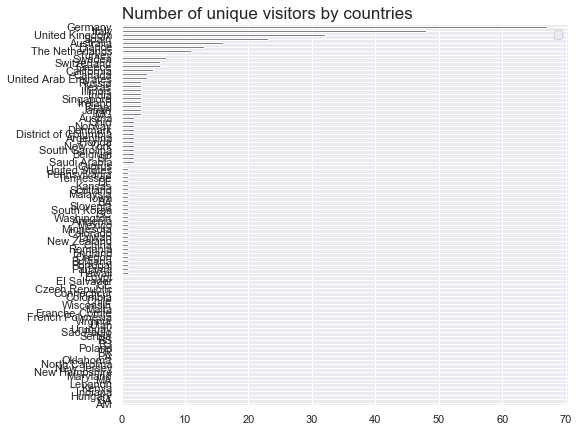

In [419]:
plt.rc("figure")
visitors_by_country['visit'].plot(kind='barh', color='grey')
sns.despine()
plt.title('Number of unique visitors by countries', loc='left', size=17)
plt.legend("")
plt.ylabel("")

Text(0, 0.5, '')

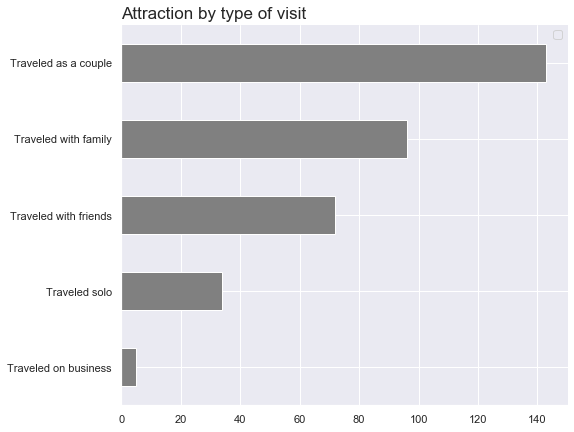

In [382]:
plt.rc("figure", figsize=(8, 7))
type_of_visitors['city'].plot(kind='barh', color='grey')
sns.despine()
plt.title('Attraction by type of visit', loc='left', size=17)
plt.legend("")
plt.ylabel("")

In [179]:
def clustering_preprocessing(dataframe):
    df = dataframe.copy()
    df['date'] = df['date'].replace({'Erlebnisdatum: ': ''}, regex=True)
    df['visit'] = df['visit'].replace({'Reiseart: ': ''}, regex=True)
    df[['city', 'country']] = df['visitor_origin'].str.split(',', expand=True, n=2)
    df = pd.get_dummies(df, columns=["visit", "country"])
    df = df.drop(['rating'], axis=1)
    return df

In [182]:
Englischer_Garten_clustering = clustering_preprocessing(Englischer_Garten)

In [183]:
Englischer_Garten_clustering

,date,title,text,visitor_origin,city,visit_allein,visit_als Paar,visit_geschäftlich,visit_mit Freunden,visit_mit der Familie,country_ Austria,country_ Deutschland,country_ Frankreich,country_ Germany,country_ Italien,country_ Mexiko,country_ Schweiz,country_ Washington,country_ Österreich
0,August 2020,Sehenswert,Der englische Garten erstreckt sich über mehre...,"München, Deutschland",München,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,August 2020,Schöm angelegter Park,Es ist nicht schön Sauber aber das habe ich be...,"Rottweil, Deutschland",Rottweil,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,August 2020,Urlaubsgefühle mitten in München,Der Englische Garten gehört definitiv zu den M...,"Hammersbach, Deutschland",Hammersbach,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,Juli 2020,Eine Oase,Lange Spaziergänge sind hier genauso möglich w...,"Bensheim, Germany",Bensheim,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,Juli 2020,Lustwandeln in München,Sehr schön zum spazieren gehen. Gemütlich und ...,"Dortmund, Deutschland",Dortmund,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,September 2018,Familienurlaub,"Sehr zu empfehlen mit Kindern,fantastischer Bi...",NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0
301,Oktober 2018,Eine grüne Lunge mitten in der Stadt :-),Der Englische Garten ist Münchner Lebensart pu...,"München, Deutschland",München,0,1,0,0,0,0,1,0,0,0,0,0,0,0
302,Mai 2018,Schöner Park inmitten von München,Perfekt für lange Spaziergänge. Erholsames Erl...,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0
303,Juli 2018,Kocherlball,"Traumhafter, größter Park Münchens. Relaxen, e...",NaN,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [184]:
import locale
locale.setlocale(locale.LC_ALL, '')

'German_Germany.1252'

In [190]:
Englischer_Garten['date']= [datetime.strptime(date, '%m %Y')for date in Englischer_Garten['date']]

ValueError: time data 'August 2020' does not match format '%d/%m/%Y'

In [682]:
a = type_of_visitors.T

In [683]:
a

visit,Traveled on business,Traveled solo,Traveled with friends,Traveled with family,Traveled as a couple
visitor_origin,5,34,72,96,143
city,5,34,72,96,143
country,5,33,69,86,135
extra,0,0,1,0,1


visit,Traveled on business,Traveled solo,Traveled with friends,Traveled with family,Traveled as a couple
visitor_origin,5,34,72,96,143


In [211]:
Englischer_Garten.head(50)

,date,title,text,rating,visitor_origin,visit
0,2020-08-01,Sehenswert,Der englische Garten erstreckt sich über mehre...,40,"München, Deutschland",als Paar
1,2020-08-01,Schöm angelegter Park,Es ist nicht schön Sauber aber das habe ich be...,40,"Rottweil, Deutschland",als Paar
2,2020-08-01,Urlaubsgefühle mitten in München,Der Englische Garten gehört definitiv zu den M...,50,"Hammersbach, Deutschland",als Paar
3,2020-07-01,Eine Oase,Lange Spaziergänge sind hier genauso möglich w...,50,"Bensheim, Germany",NaN
4,2020-07-01,Lustwandeln in München,Sehr schön zum spazieren gehen. Gemütlich und ...,50,"Dortmund, Deutschland",NaN
5,2020-08-01,Sehenswert,Der englische Garten erstreckt sich über mehre...,40,"München, Deutschland",als Paar
6,2020-08-01,Schöm angelegter Park,Es ist nicht schön Sauber aber das habe ich be...,40,"Rottweil, Deutschland",als Paar
7,2020-08-01,Grand parc fréquenté,"Très beau et très fréquenté des familles, beau...",30,"Toulouse, Frankreich",NaN
8,2020-08-01,Urlaubsgefühle mitten in München,Der Englische Garten gehört definitiv zu den M...,50,"Hammersbach, Deutschland",als Paar
9,2020-08-01,Skuffende,Når man kommer fra vandring i smukke og rene G...,30,"Frederiksberg, Dänemark",NaN
